In [3]:
!mkdir datasets
!unrar x /content/drive/MyDrive/train_images.rar /content/datasets

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Extracting  /content/datasets/train_images/Z/image_313609.jpg             97%  OK 
Extracting  /content/datasets/train_images/Z/image_313610.jpg             97%  OK 
Extracting  /content/datasets/train_images/Z/image_313611.jpg             97%  OK 
Extracting  /content/datasets/train_images/Z/image_313612.jpg             97%  OK 
Extracting  /content/datasets/train_images/Z/image_313613.jpg             97%  OK 
Extracting  /content/datasets/train_images/Z/image_313614.jpg             97%  OK 
Extracting  /content/datasets/train_images/Z/image_313615.jpg             97%  OK 
Extracting  /content/datasets/train_images/Z/image_313616.jpg             97%  OK 
Extracting  /content/datasets/train_images/Z/image_313617.jpg             97%  OK 
Extracting  /content/datasets/train_images/Z/image_313618.jpg             97%  OK 
Extracting  /content/datasets/tra

In [5]:
!unrar x /content/drive/MyDrive/test_images.rar /content/datasets

Görüntülenen çıkış son 5000 satıra kısaltıldı.
Extracting  /content/datasets/test_images/V/img_18715.jpg                 84%  OK 
Extracting  /content/datasets/test_images/V/img_18780.jpg                 84%  OK 
Extracting  /content/datasets/test_images/V/img_18781.jpg                 84%  OK 
Extracting  /content/datasets/test_images/V/img_1886.jpg                  84%  OK 
Extracting  /content/datasets/test_images/V/img_1915.jpg                  84%  OK 
Extracting  /content/datasets/test_images/V/img_1929.jpg                  84%  OK 
Extracting  /content/datasets/test_images/V/img_1957.jpg                  84%  OK 
Extracting  /content/datasets/test_images/V/img_1977.jpg                  84%  OK 
Extracting  /content/datasets/test_images/V/img_2097.jpg                  84%  OK 
Extracting  /content/datasets/test_images/V/img_2128.jpg                  84%  OK 
Extracting  /content/datasets/tes

In [6]:
!pip install torch torchvision matplotlib scikit-learn ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 113.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 91.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 53.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 18.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 93.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 63.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninst

In [7]:
import os
import glob
import cv2
import yaml
import numpy as np
import matplotlib.pyplot as plt
from ultralytics import YOLO
from sklearn.metrics import confusion_matrix, accuracy_score

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [9]:
import os
import yaml

# Ortak üst dizin
base_path = "/content/datasets"

# Eğitim ve test dizinlerinin adları (base_path altında yer alıyor)
train_folder = "train"
val_folder = "val"
test_folder = "test"

# Sınıf isimlerini, train_images klasörü altındaki alt klasör isimlerinden alalım
train_dir = os.path.join(base_path, train_folder)
classes = sorted([d for d in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, d))])

# YAML dosyası için veri ayarları
data_dict = {
    "path": base_path,          # Ortak dizin
    "train": train_folder,      # base_path altındaki eğitim verileri
    "val": val_folder,          # base_path altındaki validasyon verileri
    "test": test_folder,        # base_path altındaki test verileri
    "names": classes            # Sınıf isimleri
}

# YAML dosyasını oluştur ve kaydet
with open("/content/datasets/data.yaml", "w") as f:
    yaml.dump(data_dict, f)
print("data.yaml oluşturuldu. Sınıflar:", classes)


data.yaml oluşturuldu. Sınıflar: ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']


In [10]:
# 2. Hazır YOLOv8 sınıflandırma modelini yükleme
# Bu örnekte, 'yolov8n-cls.pt' önceden eğitilmiş bir model olarak kullanılıyor.
model = YOLO("yolov8n-cls.pt")

100%|██████████| 5.31M/5.31M [00:00<00:00, 259MB/s]


In [11]:
# 3. Modeli eğitme
# İstenirse epoch sayısı, öğrenme oranı (lr), görüntü boyutu vs. parametreleri ayarlanabilir.
model.train(data="/content/datasets/", epochs=10, imgsz=28)

Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
engine/trainer: task=classify, mode=train, model=yolov8n-cls.pt, data=/content/datasets/, epochs=10, time=None, patience=100, batch=16, imgsz=28, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, l

100%|██████████| 5.35M/5.35M [00:00<00:00, 232MB/s]


AMP: checks passed ✅
WARNING ⚠️ imgsz=[28] must be multiple of max stride 32, updating to [32]


train: Scanning /content/datasets/train... 187200 images, 0 corrupt: 100%|██████████| 187200/187200 [00:53<00:00, 3523.40it/s]


train: New cache created: /content/datasets/train.cache


val: Scanning /content/datasets/val... 31200 images, 0 corrupt: 100%|██████████| 31200/31200 [00:08<00:00, 3512.78it/s]


val: New cache created: /content/datasets/val.cache
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 32 train, 32 val
Using 8 dataloader workers
Logging results to runs/classify/train
Starting training for 10 epochs...

      Epoch    GPU_mem       loss  Instances       Size


       1/10     0.176G       3.63         16         32:   0%|          | 18/11700 [00:01<07:30, 25.96it/s]

       1/10     0.176G      3.619         16         32:   0%|          | 38/11700 [00:01<06:00, 32.34it/s]
100%|██████████| 755k/755k [00:00<00:00, 106MB/s]
               classes   top1_acc   top5_acc: 100%|██████████| 975/975 [00:07<00:00, 125.86it/s]

                   all       0.82      0.978



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 975/975 [00:07<00:00, 129.22it/s]

                   all      0.881       0.99



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 975/975 [00:07<00:00, 127.80it/s]

                   all      0.883       0.99



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 975/975 [00:07<00:00, 130.87it/s]


                   all      0.883       0.99

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 975/975 [00:07<00:00, 127.09it/s]

                   all      0.895      0.992



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 975/975 [00:07<00:00, 133.01it/s]


                   all      0.904      0.994

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 975/975 [00:07<00:00, 127.54it/s]


                   all      0.911      0.995

      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 975/975 [00:07<00:00, 127.89it/s]

                   all      0.917      0.996



      Epoch    GPU_mem       loss  Instances       Size


               classes   top1_acc   top5_acc: 100%|██████████| 975/975 [00:07<00:00, 123.93it/s]

                   all      0.922      0.996



      Epoch    GPU_mem       loss  Instances       Size


      10/10     0.227G      0.525         16         32: 100%|██████████| 11700/11700 [04:38<00:00, 41.99it/s]
               classes   top1_acc   top5_acc: 100%|██████████| 975/975 [00:07<00:00, 131.56it/s]


                   all      0.927      0.996

10 epochs completed in 0.816 hours.
Optimizer stripped from runs/classify/train/weights/last.pt, 3.0MB
Optimizer stripped from runs/classify/train/weights/best.pt, 3.0MB

Validating runs/classify/train/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.11.11 torch-2.6.0+cu124 CUDA:0 (NVIDIA A100-SXM4-40GB, 40507MiB)
YOLOv8n-cls summary (fused): 30 layers, 1,468,186 parameters, 0 gradients, 3.3 GFLOPs
train: /content/datasets/train... found 187200 images in 26 classes ✅ 
val: /content/datasets/val... found 31200 images in 26 classes ✅ 
test: /content/datasets/test... found 31200 images in 26 classes ✅ 


               classes   top1_acc   top5_acc: 100%|██████████| 975/975 [00:05<00:00, 179.31it/s]


                   all      0.927      0.996
Speed: 0.0ms preprocess, 0.1ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to runs/classify/train


ultralytics.utils.metrics.ClassifyMetrics object with attributes:

confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a0df69e10d0>
curves: []
curves_results: []
fitness: 0.9613621830940247
keys: ['metrics/accuracy_top1', 'metrics/accuracy_top5']
results_dict: {'metrics/accuracy_top1': 0.926730751991272, 'metrics/accuracy_top5': 0.9959936141967773, 'fitness': 0.9613621830940247}
save_dir: PosixPath('runs/classify/train')
speed: {'preprocess': 0.0065727340063695475, 'inference': 0.14391241249976852, 'loss': 0.00034904397409718513, 'postprocess': 0.0005424833655244863}
task: 'classify'
top1: 0.926730751991272
top5: 0.9959936141967773

In [19]:
result = model.predict("/content/datasets/test/A/image_0.jpg")
result[0].probs.data


image 1/1 /content/datasets/test/A/image_0.jpg: 32x32 A 0.76, H 0.15, L 0.01, N 0.01, X 0.01, 4.3ms
Speed: 2.8ms preprocess, 4.3ms inference, 0.1ms postprocess per image at shape (1, 3, 32, 32)


tensor([7.6203e-01, 1.2314e-03, 5.5891e-04, 1.0326e-03, 1.2027e-03, 3.2665e-03, 1.4104e-03, 1.5148e-01, 4.9437e-03, 1.3686e-03, 7.2240e-03, 1.4950e-02, 7.1680e-03, 1.0919e-02, 5.5523e-04, 3.6773e-03, 5.7055e-04, 5.6525e-03, 6.2371e-04, 1.9861e-03, 2.9346e-03, 4.8646e-04, 8.7598e-04, 7.9093e-03, 4.4048e-03, 1.5330e-03],
       device='cuda:0')

In [20]:
import torch

# 4. Test aşamasında modelin tahminlerini elde etme
true_labels = []
pred_labels = []

# Test dizinindeki veriler için
test_base = "/content/datasets/test"

for cls in os.listdir(test_base):
    class_path = os.path.join(test_base, cls)
    if os.path.isdir(class_path):
        # Tüm dosya uzantılarındaki dosyaları alıyoruz
        image_files = glob.glob(os.path.join(class_path, "*.*"))
        for image_file in image_files:
            results = model.predict(source=image_file, verbose=False)

            # "probs" nesnesinden sayısal veriye ulaşmaya çalışalım:
            if hasattr(results[0], 'probs') and results[0].probs is not None:
                prob_obj = results[0].probs
                # İlk olarak, 'data' attribute'u varsa onu kullanalım
                if hasattr(prob_obj, "data"):
                    prob = prob_obj.data
                else:
                    # Eğer 'data' attribute'u yoksa, listeye çevirip numpy array yapmaya çalışalım
                    try:
                        prob = np.array(prob_obj.tolist())
                    except Exception as e:
                        # Son çare olarak, her elemanı float'a çeviriyoruz
                        prob = np.array([float(x) for x in prob_obj])

                # Eğer sonuç torch.Tensor ise, CPU'da numpy array'e aktaralım
                if isinstance(prob, torch.Tensor):
                    prob = prob.cpu().numpy()

                pred_idx = int(np.argmax(prob))
            else:
                # Eğer probs yoksa, pred alanını kullanıyoruz
                pred_idx = int(results[0].pred[0])

            # Sınıf isimleri "classes" listesinde tanımlı kabul ediliyor
            pred_class = classes[pred_idx]
            true_labels.append(cls)
            pred_labels.append(pred_class)

In [21]:
# 5. Confusion Matrix (karışıklık matrisi) ve doğruluk skorunu hesaplama
cm = confusion_matrix(true_labels, pred_labels, labels=classes)
acc = accuracy_score(true_labels, pred_labels)
print("Test Doğruluk: {:.2f}%".format(acc * 100))

Test Doğruluk: 92.66%


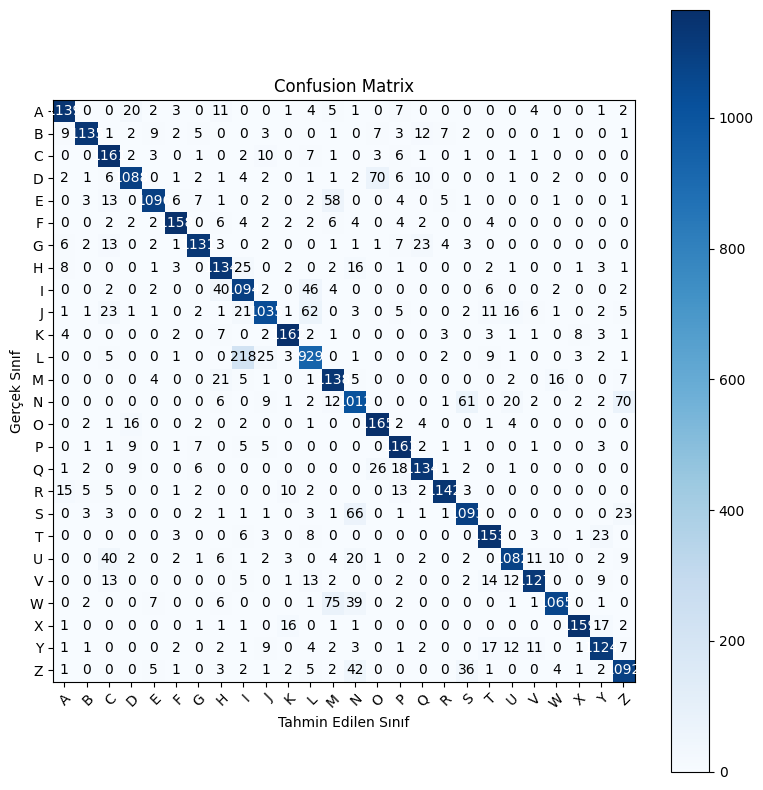

In [22]:
# 6. Confusion Matrix’i görselleştirip kaydetme
fig, ax = plt.subplots(figsize=(8, 8))
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(
    xticks=np.arange(len(classes)),
    yticks=np.arange(len(classes)),
    xticklabels=classes,
    yticklabels=classes,
    title='Confusion Matrix',
    ylabel='Gerçek Sınıf',
    xlabel='Tahmin Edilen Sınıf'
)
plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")

# Her hücreye sayıları ekleyelim
fmt = 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.savefig("/content/drive/MyDrive/yolo_confusion_matrix.png")
plt.show()